To work nicely this notebook must be run with the `inline` matplotlib backend for `pylab`.

In [1]:
import sympy as sp
import sympy.plotting as splt

x, y, z, u, v, t = sp.symbols("x, y, z, u, v, t ")

The SymPy plotting module centers around the `Plot` class. A `Plot` instance 
corresponds roughly to matplotlib figure/subplot.

`Plot` instances are basically lists of `Series` instances and some 
additional per plot options like title and labels. The instances of
`Series` (as in "data series") are the data structures actually containing 
the entities to be plotted (for instance there is `Parametric2DLineSeries`).

Most of the time you are not required to build your `Series` and `Plot` 
objects (they are not even imported by default). Instead you use the 
following helper functions:

In [2]:
(
    splt.plot,
    splt.plot_parametric,
    splt.plot3d,
    splt.plot3d_parametric_line,
    splt.plot3d_parametric_surface,
)


(<function sympy.plotting.plot.plot(*args, show=True, **kwargs)>,
 <function sympy.plotting.plot.plot_parametric(*args, show=True, **kwargs)>,
 <function sympy.plotting.plot.plot3d(*args, show=True, **kwargs)>,
 <function sympy.plotting.plot.plot3d_parametric_line(*args, show=True, **kwargs)>,
 <function sympy.plotting.plot.plot3d_parametric_surface(*args, show=True, **kwargs)>)

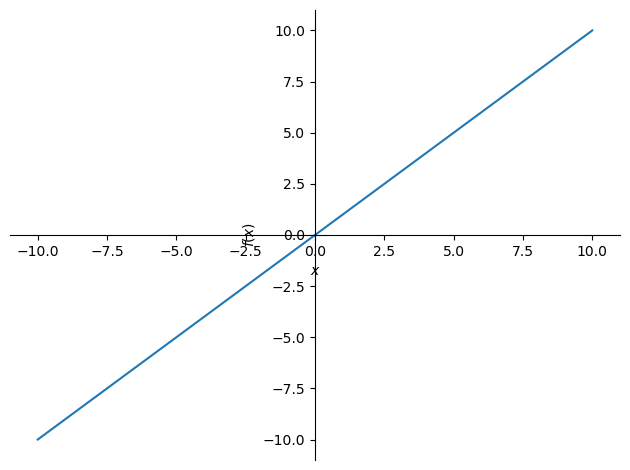

Plot object containing:
[0]: cartesian line: x for x over (-10.0, 10.0)


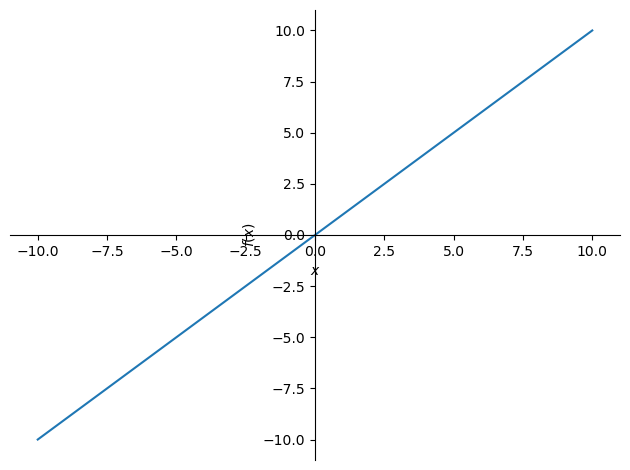

In [3]:
obj = splt.plot(x)
print(obj)
obj.show()


The `plot` function created the `Plot` object for us and populated it 
with the appropriate `Series`. Then it also called the `show` method.


Some other helpers (their docstring are well worth a read):

If we want something fancier that is hard to build directly with the
helper functions we can do it manually by modifying the `Plot` instance.

Plot object containing:
[0]: cartesian line: x for x over (-10.0, 10.0)
[1]: parametric cartesian line: (sin(x), cos(x)) for x over (-10.0, 10.0)


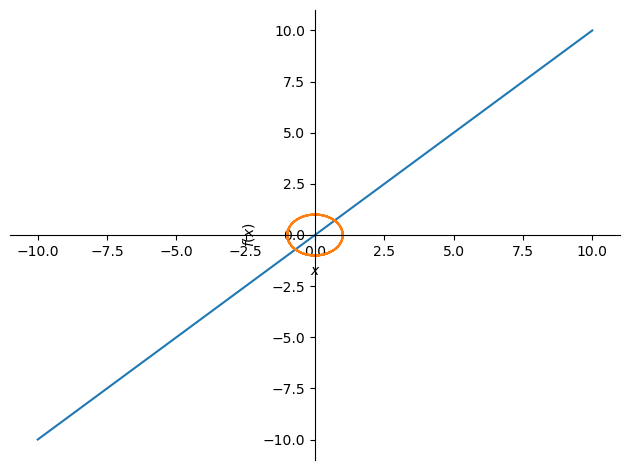

In [4]:
a = splt.plot(x, show=False)
b = splt.plot_parametric(sp.sin(x), sp.cos(x), show=False)
a.extend(b)
print(a)
a.show()

And we can change the global options for this plot.

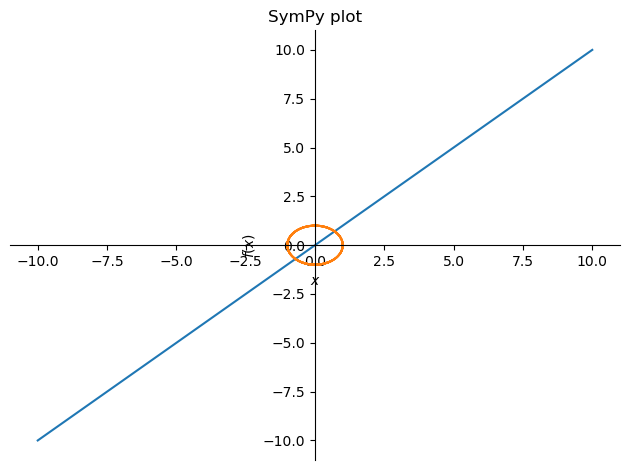

In [5]:
a.title = "SymPy plot"
a.show()

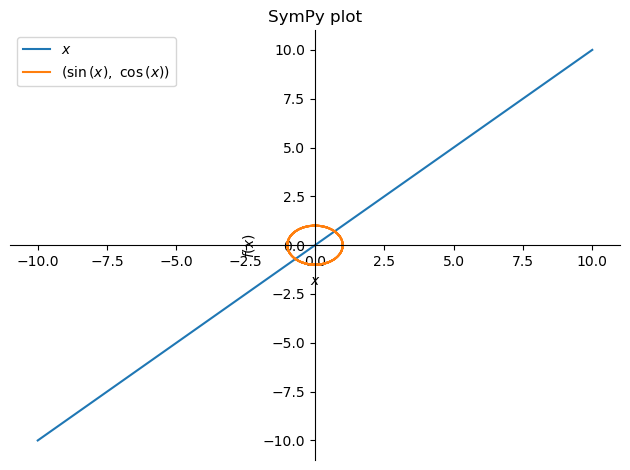

In [6]:
a.legend = True
a.show()

Or the options of each `Series` instance.

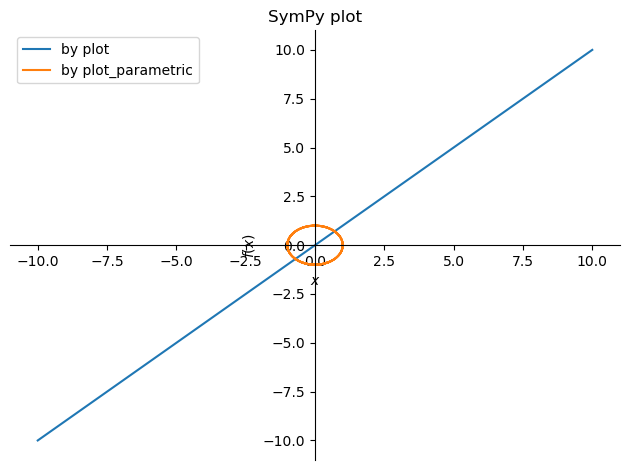

In [7]:
a[0].label = "by plot"
a[1].label = "by plot_parametric"
a.show()

And a rather cool idea that we implemented is what we call "aesthetics".
First of all, it is not well tested yet, so be careful when you are 
using it.

"aesthetic" is some way to modify the look of a `Series` instance, 
parametrized by coordinates. For instance you can change the color of a 
curve to be:

- constant

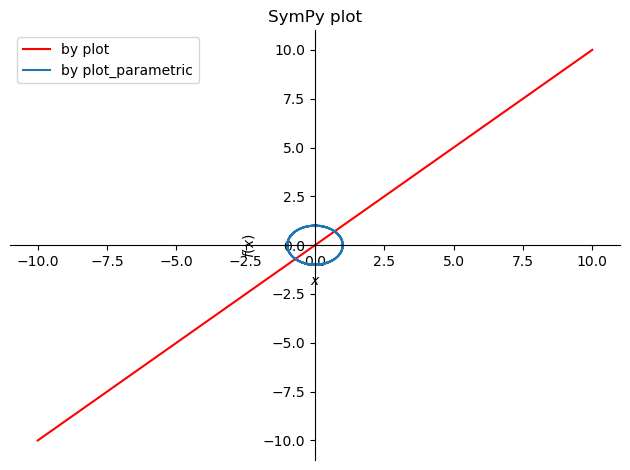

In [8]:
a[0].line_color = "red"  # what is permitted depends on the choice of backend
a.show()

* dependent on coordinates

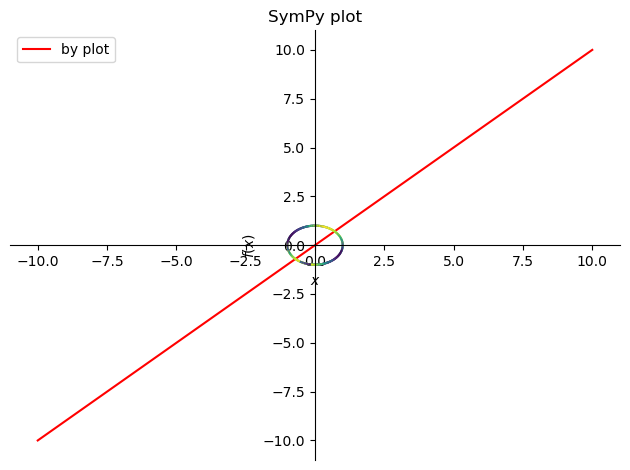

In [9]:
a[1].line_color = lambda hor, ver: hor * ver
a.show()

* or dependent on parameter for parametrized curves

___!! Following does not work:___

In [10]:
# a[1].line_color = lambda param: sp.sin(param * 10)
# a.show()

The arity of the lambda function is used to choose what mode of colouring 
is used. Check the `examples` folder for much nicer examples.

One important thing to remember is that SymPy is not trying to create 
yet another general plotting library. The SymPy plotting module deals 
with the issues of evaluating symbolic expressions efficiently, not 
with the issue of creating a nice drawing api. This is why you do not 
see a `draw_point` or `change_perspective` methods. These are routines 
that should be implemented by the backend. If you need to access them, 
just access the backend for the `Plot` instance:

In [11]:
type(a._backend.fig)

matplotlib.figure.Figure